# Анализ продаж компьютерных игр для интернет-магазина «Стримчик»

# Описание проекта

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Нам будут доступны следующие данные:  
Name — название игры  
Platform — платформа  
Year_of_Release — год выпуска  
Genre — жанр игры  
NA_sales — продажи в Северной Америке (миллионы проданных копий)  
EU_sales — продажи в Европе (миллионы проданных копий)  
JP_sales — продажи в Японии (миллионы проданных копий)  
Other_sales — продажи в других странах (миллионы проданных копий)  
Critic_Score — оценка критиков (максимум 100)  
User_Score — оценка пользователей (максимум 10)  
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.  
Данные за 2016 год могут быть неполными.

В ходе анализа мы пройдем следующие шаги:
- откроем файл и изучим данные;
- проведем предобработку данных для качественного проведения анализа;
- проведем исследовательский анализ данных;
- составим портрет пользователя каждого региона;
- проверим некоторые гипотезы;
- напишем общий вывод.

##  Откроем файл с данными и изучим общую информацию

In [1]:
#импортируем необходимые библиотеки
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from scipy import stats as st

In [2]:
df = pd.read_csv('/datasets/games.csv') #сохраняем файл в датафрейм
display(df)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [3]:
#смотрим общую информацию о данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
#смотрим количество пропусков
df.isna().sum().sort_values(ascending=False)

Critic_Score       8578
Rating             6766
User_Score         6701
Year_of_Release     269
Name                  2
Genre                 2
Platform              0
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
dtype: int64

In [5]:
#считаем процент пропусков от общего числа строк
round((df.isna().sum() / len(df) * 100), 2)

Name                0.01
Platform            0.00
Year_of_Release     1.61
Genre               0.01
NA_sales            0.00
EU_sales            0.00
JP_sales            0.00
Other_sales         0.00
Critic_Score       51.32
User_Score         40.09
Rating             40.48
dtype: float64

In [6]:
#проверяем наличие явных дубликатов
df.duplicated().value_counts()

False    16715
dtype: int64

При первоначальном изучении данных мы выявили следующее:
- в большинстве столбцов пропусков нет или имеется незначительное количество, но в 3 столбцах процент пропусков составляет 40-51%%, 
- в названиях столбцов используется разный регистр, 
- в некоторых столбцах требуется изменение формата данных,
- явные дубликаты отсутствуют.

## Проведем предобработку данных

### Приведем все названия столбцов к нижнему регистру

In [7]:
df.columns = df.columns.str.lower()
display(df.head(5))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Преобразуем данные в нужные типы

Преобразуем тип данных в столбце year_of_release в строковый и уберем точку и 0 в конце, так как год не может быть дробным числом, а также математические операции с годом совершать нам не нужно будет. Также удалим строки, в которых год не указан (269 строк или 1,61% от всех данных), так как данные без года выпуска игры неинформативны и составляют небольшую часть всего датафрейма.

In [8]:
#сначала удалим пропуски
df = df.dropna(axis=0, how='all', subset=['year_of_release'])
df['year_of_release'] = df['year_of_release'].astype(int) #изменим тип данных на целое число
df['year_of_release'] = df['year_of_release'].astype(str) #изменим тип данных на str

In [9]:
df['year_of_release'].sort_values(ascending=True).unique()

array(['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016'], dtype=object)

Теперь перейдем к столбцу user_score и посмотриим, какие данные содержатся в нем.

In [10]:
df['user_score'].sort_values(ascending=True).unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

Столбец user_score приведем к типу данных float, так как столбец содержит числовые данные, числа дробные. При этом выявлено, что столбец также содержит строковые данные - значения tbd (to be determined), что означает, что рейтинг еще не определен, а также пропуски (nan). Так как tbd и nan по сути означают, что данные неизвестны, то заменим значения tbd на nan.

In [11]:
df['user_score'] = df['user_score'].replace('tbd', np.nan) #заменяем tbd на nan
df['user_score'] = df['user_score'].fillna(0) #заполняем пропуски 0
df['user_score'] = df['user_score'].astype(float) #меняем тип данных
df['user_score'] = df['user_score'].replace(0, np.nan) #заменяем 0 на nan

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  object 
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Теперь во всех столбцах тип данных соответствует содержащимся в нем данным.

### Обработаем пропуски

У нас есть две строки с пропусками в столбцах название и жанр. Удалим данные строки, так как они не помогут анализу, а их удаление на общие результаты не повлияет.

In [13]:
display(df.loc[df['name'].isnull()]) #посмотрим строки с пропусками в названии

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [14]:
#удалим строки с пропусками в названии игры
df = df.dropna(axis=0, how='all', subset=['name']) 

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  object 
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Остались пропуски в 3 столбцах: оценка критиков, оценка пользователей и возрастной рейтинг. Оценку критиков и оценку пользователей без точных данных указать невозможно, пропуски в этих данных не помешают расчетам, поэтому оставим эти пропуски. 

Пропуски в столбце возрастной рейтинг заменим на значения Unknown. Мы этот рейтинг также не знаем, но пропуски будут заполнены, и тогда с этими данными можно будет работать.

In [16]:
df['rating'] = df['rating'].fillna('Unknown') #заполняем пропуски значением Unknown

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  object 
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


### Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец

In [18]:
#суммируем продажи всех регионов
df['total_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

## Исследовательский анализ данных

### Посмотрим, сколько игр выпускалось в разные годы

Сгруппируем данные по году выпуска и посчитаем количество выпущенных игр в каждом году.

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


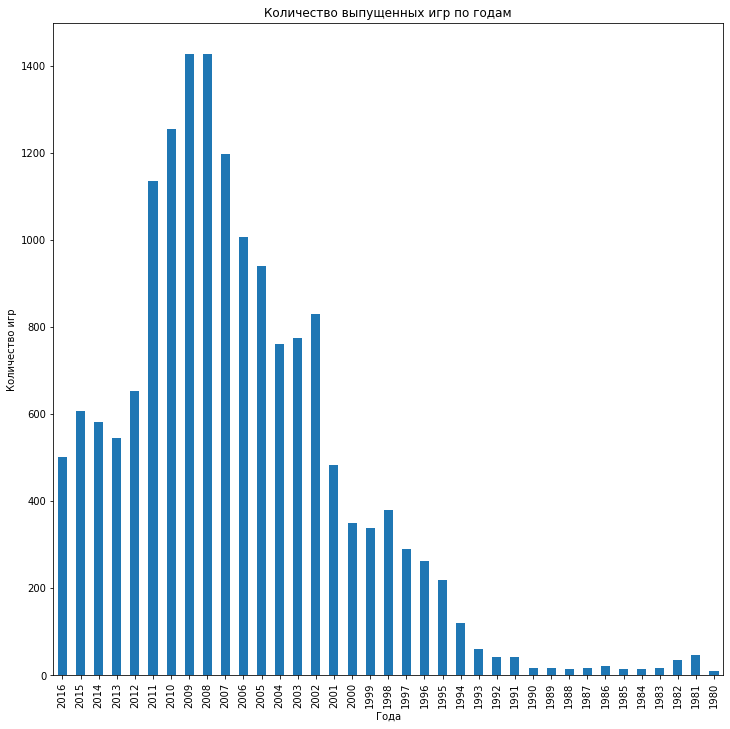

In [19]:
#сгруппируем данные по году и посчитаем количество названий
display(df.groupby(['year_of_release']).agg({'name': 'count'}))

df.groupby(['year_of_release']).agg({'name': 'count'}) \
.sort_values(by='year_of_release', ascending=False) \
.plot(kind='bar', figsize=(12,12), legend=False)

plt.title('Количество выпущенных игр по годам')
plt.xlabel('Года')
plt.ylabel('Количество игр')
plt.show()

Видим, что до 1993 года выпускалось совсем небольшое количество игр. Затем начинается постепенный рост. После 2011 года наблюдаем сильный спад в выпуске компьютерных игр. Судя по этому, данными за период 1980-1993 можно пренебречь. 

### Посмотрим, как менялись продажи по платформам

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


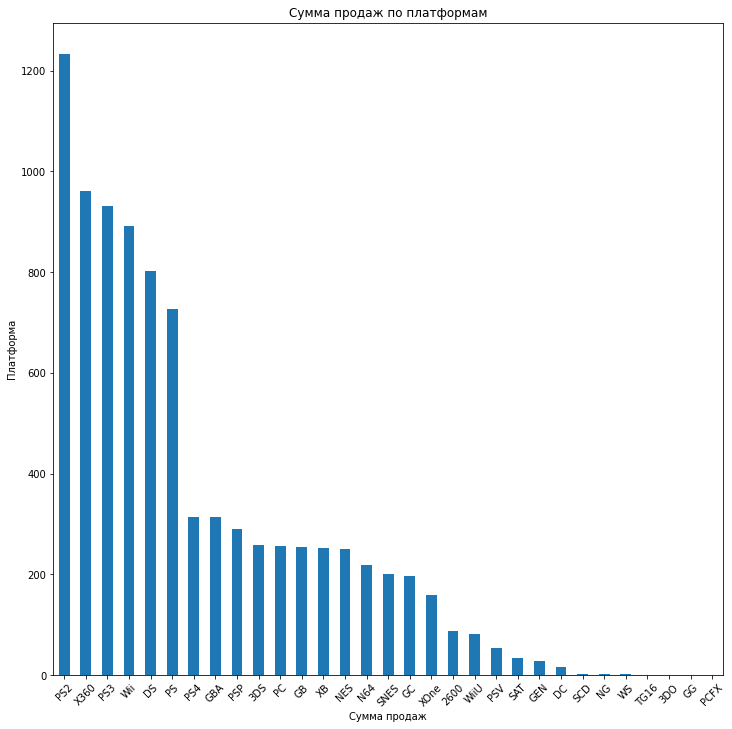

In [20]:
#посмотрим самые продаваемые платформы за все года
display(df.groupby(['platform']).agg({'total_sales' : 'sum'}) \
.sort_values('total_sales', ascending=False))

df.groupby(['platform']).agg({'total_sales' : 'sum'}) \
.sort_values('total_sales', ascending=False) \
.plot(kind='bar', figsize=(12,12), legend=False)

plt.title('Сумма продаж по платформам')
plt.xlabel('Сумма продаж')
plt.ylabel('Платформа')
plt.xticks(rotation=45)
plt.show()

По данному графику видим, что лидерами по продажам являются 6 платформ: PS2, X360, PS3, Wii, DS и PS. Суммарные продажи игр на этих платформах более чем в 2 раза превышают продажи игр на остальных платформах. При этом в данном графике учтены продажи за весь доступный период. При изучении данных за актуальный период лидеры могут измениться.

Выберем 6 платформ с наибольшими суммарными продажами и построим распределения по годам.

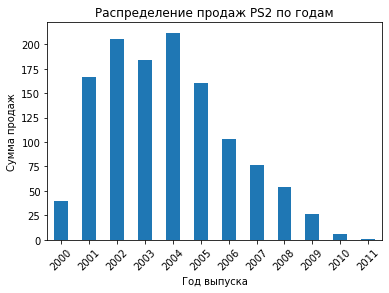

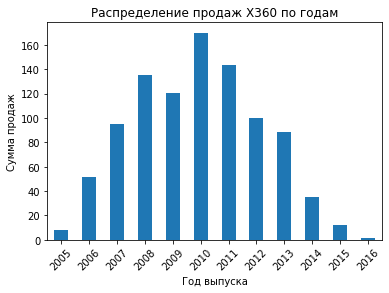

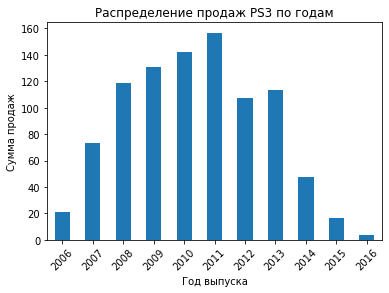

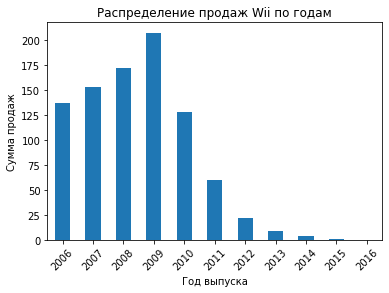

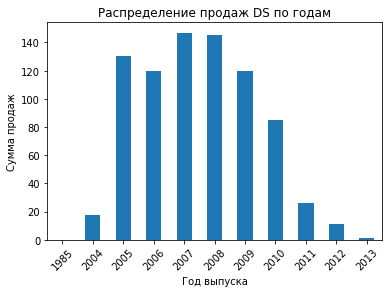

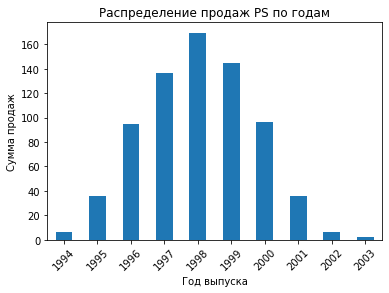

In [21]:
#1
df.query('platform == "PS2"').pivot_table(index='year_of_release', 
                                          values = 'total_sales', 
                                          aggfunc = 'sum').plot(kind='bar', legend=False)

plt.title('Распределение продаж PS2 по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Сумма продаж')
plt.xticks(rotation=45)
plt.show()

#2
df.query('platform == "X360"').pivot_table(index='year_of_release', 
                                          values = 'total_sales', 
                                          aggfunc = 'sum').plot(kind='bar', legend=False)

plt.title('Распределение продаж X360 по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Сумма продаж')
plt.xticks(rotation=45)
plt.show()

#3
df.query('platform == "PS3"').pivot_table(index='year_of_release', 
                                          values = 'total_sales', 
                                          aggfunc = 'sum').plot(kind='bar', legend=False)

plt.title('Распределение продаж PS3 по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Сумма продаж')
plt.xticks(rotation=45)
plt.show()

#4
df.query('platform == "Wii"').pivot_table(index='year_of_release', 
                                          values = 'total_sales', 
                                          aggfunc = 'sum').plot(kind='bar', legend=False)

plt.title('Распределение продаж Wii по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Сумма продаж')
plt.xticks(rotation=45)
plt.show()

#5
df.query('platform == "DS"').pivot_table(index='year_of_release', 
                                          values = 'total_sales', 
                                          aggfunc = 'sum').plot(kind='bar', legend=False)

plt.title('Распределение продаж DS по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Сумма продаж')
plt.xticks(rotation=45)
plt.show()

#6
df.query('platform == "PS"').pivot_table(index='year_of_release', 
                                          values = 'total_sales', 
                                          aggfunc = 'sum').plot(kind='bar', legend=False)

plt.title('Распределение продаж PS по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Сумма продаж')
plt.xticks(rotation=45)
plt.show()

По построенным графикам можно сказать, что средний период, за который появляются новые и исчезают старые платформы составляем 10-12 лет. Примерно 5-6 лет занимает появление игры и рост продаж до максимального значения, а затем за 5-6 лет продажи падают и совсем исчезают.

### Возьмем данные за актуальный период 

По результатам исследования в предыдущих пунктах за актуальный период примем 3 года. Создадим новый датафрейм с актуальными данными.

In [22]:
df_actual = df.query('year_of_release > "2013"')

### Проверим, какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.

In [23]:
df_actual.groupby(['platform']).agg({'total_sales' : 'sum'}) \
.sort_values('total_sales', ascending=False)

,total_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


In [24]:
df_actual_pivot = df_actual.pivot_table(index=('platform','year_of_release'), 
                                        values = 'total_sales', aggfunc = 'sum')
display(df_actual_pivot)

total_sales
platform year_of_release             
3DS      2014                   43.76
         2015                   27.78
         2016                   15.14
PC       2014                   13.28
         2015                    8.52
         2016                    5.25
PS3      2014                   47.76
         2015                   16.82
         2016                    3.60
PS4      2014                  100.00
         2015                  118.90
         2016                   69.25
PSP      2014                    0.24
         2015                    0.12
PSV      2014                   11.90
         2015                    6.25
         2016                    4.25
Wii      2014                    3.75
         2015                    1.14
         2016                    0.18
WiiU     2014                   22.03
         2015                   16.35
         2016                    4.60
X360     2014                   34.74
         2015                   11.96
         2016                    1.52
XOne     2014                   54.07
         2015                   60.14
         2016                   26.15

В датафрейме за последние 3 года осталось 10 платформ. 1 платформа в 2016 году уже не продавалась совсем, по всем остальным продажи с каждым годом снижаются. 

In [103]:
df_actual_2016 = df_actual.query('year_of_release == "2016"') \
.pivot_table(index=('platform'), \
values = 'total_sales', aggfunc = 'sum')

display(df_actual_2016.sort_values(by='total_sales', ascending=False))

,total_sales
platform,
PS4,69.25
XOne,26.15
3DS,15.14
PC,5.25
WiiU,4.60
PSV,4.25
PS3,3.60
X360,1.52
Wii,0.18


Самые высокие продажи в 2016 году были у платформ PS4 (69.25), XOne (26.15) и 3DS (15.14). В пятерку лидеров вошли также PC (5.25) и WiiU(4.60).

### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 

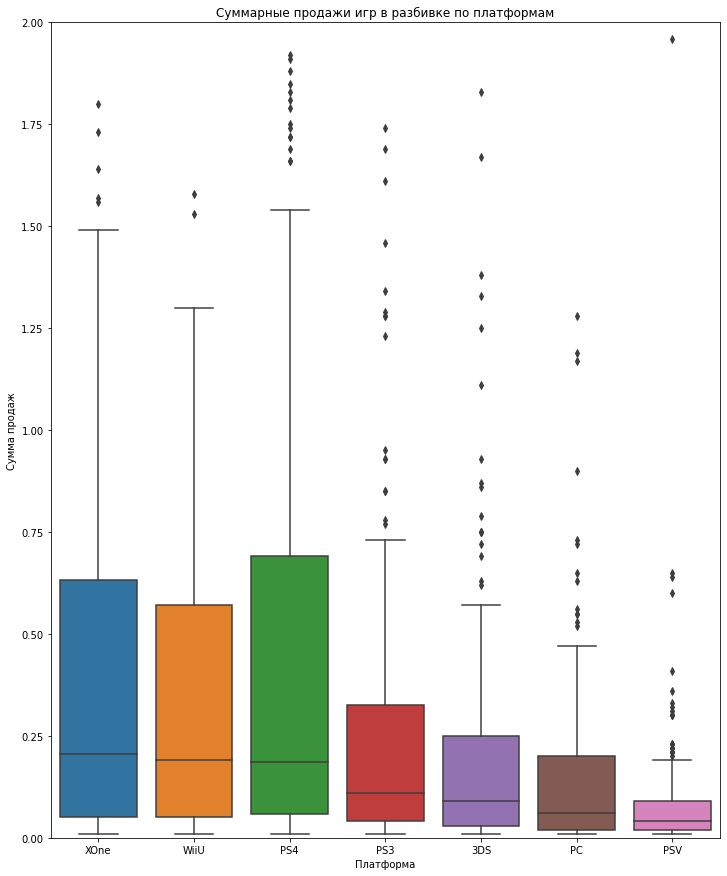

In [110]:
plt.figure(figsize=(12,15))

sns.boxplot(data=df_actual[df_actual['platform'] \
.isin(['PS4', 'XOne', '3DS', 'PC', 'WiiU', 'PSV', 'PS3'])], \
y='total_sales', x='platform', order=['XOne', 'WiiU', 'PS4', 'PS3', '3DS', 'PC', 'PSV']).set(ylim=(0,2))

plt.title('Суммарные продажи игр в разбивке по платформам')
plt.xlabel('Платформа')
plt.ylabel('Сумма продаж')
plt.show()

Для визуализации отфильтровали данные по самым перспективным платформам с учетом сводной таблицы выше. 

Видим, что на всех платформах медианные значения находятся в самом низу, при этом довольно много выбросов. То есть большинство выпускаемых игр приносят небольшую прибыль, но отдельные игры бестселлеры имеют высокие продажи.

### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. 

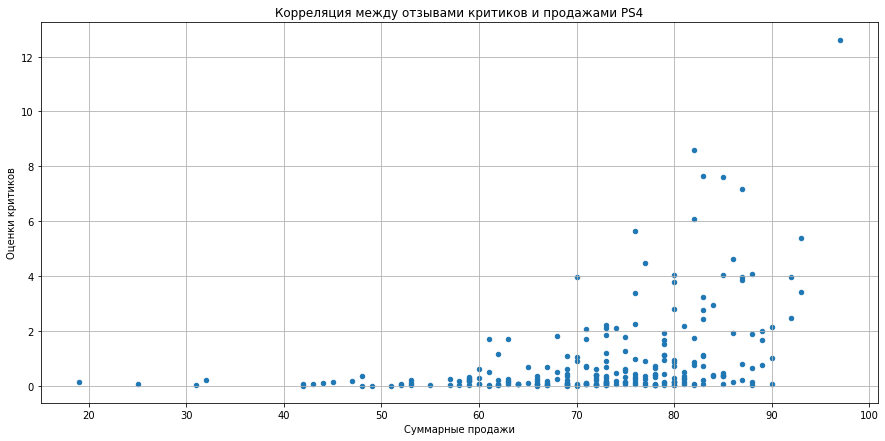

Корреляция между отзывами критиков и продажами PS4: 0.4


In [27]:
df_ps4 = df_actual.query('platform == "PS4"')

df_ps4.plot(x='critic_score', y='total_sales', kind='scatter', grid=True, figsize=(15,7))
plt.title('Корреляция между отзывами критиков и продажами PS4')
plt.xlabel('Суммарные продажи')
plt.ylabel('Оценки критиков')
plt.show()

print('Корреляция между отзывами критиков и продажами PS4:', 
      df_ps4['total_sales'].corr(df_ps4['critic_score']).round(2))

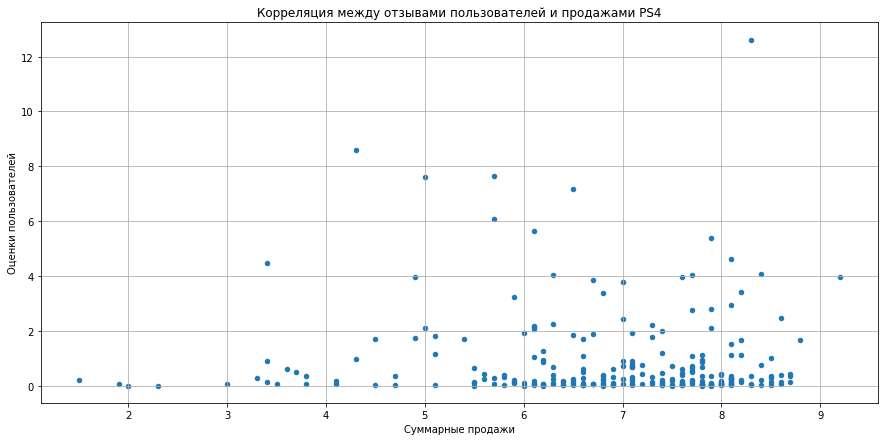

Корреляция между отзывами пользователей и продажами PS4: -0.04


In [28]:
df_ps4.plot(x='user_score', y='total_sales', kind='scatter', grid=True, figsize=(15,7))
plt.title('Корреляция между отзывами пользователей и продажами PS4')
plt.xlabel('Суммарные продажи')
plt.ylabel('Оценки пользователей')
plt.show()

print('Корреляция между отзывами пользователей и продажами PS4:', 
      df_ps4['total_sales'].corr(df_ps4['user_score']).round(2))

Видим, что корреляции с продажами нет ни у отзывов критиков, ни у отзывов пользователей. 

### Соотнесем выводы с продажами игр на других платформах.

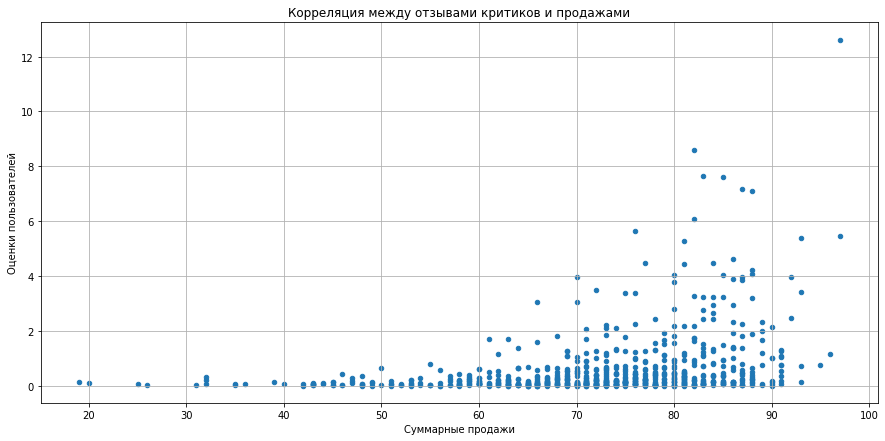

Корреляция между отзывами критиков и продажами: 0.33


In [29]:
df_actual.plot(x='critic_score', y='total_sales', kind='scatter', grid=True, figsize=(15,7))
plt.title('Корреляция между отзывами критиков и продажами')
plt.xlabel('Суммарные продажи')
plt.ylabel('Оценки пользователей')
plt.show()

print('Корреляция между отзывами критиков и продажами:', 
      df_actual['total_sales'].corr(df_actual['critic_score']).round(2))

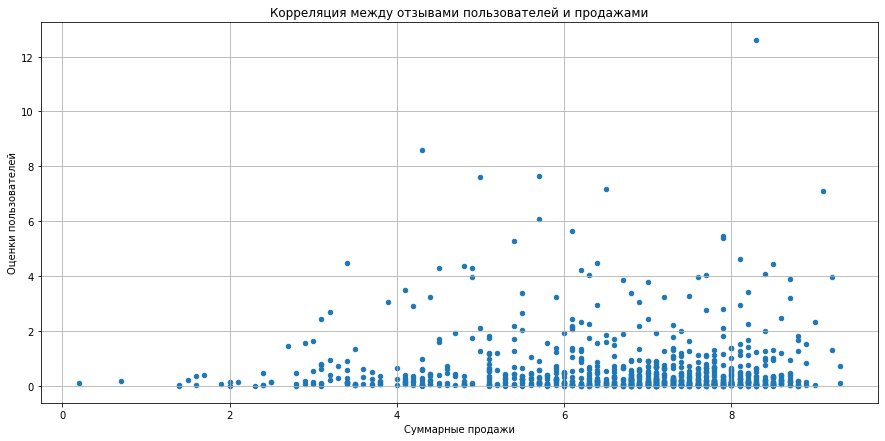

Корреляция между отзывами пользователей и продажами: -0.01


In [30]:
df_actual.plot(x='user_score', y='total_sales', kind='scatter', grid=True, figsize=(15,7))
plt.title('Корреляция между отзывами пользователей и продажами')
plt.xlabel('Суммарные продажи')
plt.ylabel('Оценки пользователей')
plt.show()

print('Корреляция между отзывами пользователей и продажами:', 
      df_actual['total_sales'].corr(df_actual['user_score']).round(2))

При рассмотрении всех платформ сразу результаты получились аналогичные результатам только по платформе PS4. Таким образом, оценки критиков и пользователей не имеют влияния на продажи.

### Посмотрим на общее распределение игр по жанрам. 

,total_sales
genre,
Puzzle,2.21
Strategy,3.96
Simulation,13.13
Adventure,17.55
Platform,18.09
Racing,27.52
Fighting,28.22
Misc,37.55
Role-Playing,101.44


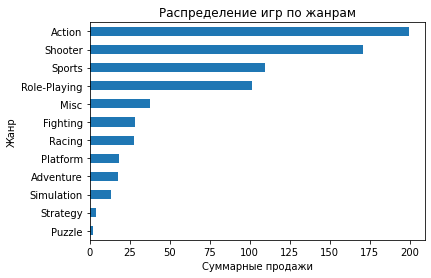

In [31]:
df_genres = (df_actual.groupby(['genre'])
             .agg({'total_sales': 'sum'}).sort_values(by='total_sales', ascending=True))
display(df_genres)

df_genres.plot(
    kind = 'barh',
    title = 'Распределение игр по жанрам',
    legend = False)
plt.xlabel('Суммарные продажи')
plt.ylabel('Жанр')
plt.show()

Значительно выделяются по продажам игры жанров Action, Shooter, Sports и Role-Playing.  В остальных жанрах продажи в 10 и 100 раз меньше. Совсем мало продаж у игр жанров Strategy и Puzzle. 

Рассмотрим теперь основные статистические характеристики суммарных продаж по жанрам.

In [32]:
df_actual.groupby(['genre'], sort=False).total_sales.describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Shooter,128.0,1.335469,2.050567,0.01,0.1725,0.515,1.6175,14.63
Action,619.0,0.322068,0.798181,0.01,0.0300,0.090,0.2800,12.62
Role-Playing,221.0,0.459005,1.177284,0.01,0.0500,0.110,0.3600,11.68
Sports,161.0,0.680000,1.239736,0.01,0.0600,0.180,0.6400,8.58
Fighting,60.0,0.470333,1.188053,0.01,0.0600,0.125,0.3200,7.55
Racing,69.0,0.398841,0.963716,0.01,0.0300,0.090,0.2500,7.09
Misc,113.0,0.332301,0.736999,0.01,0.0300,0.090,0.3200,5.27
Platform,38.0,0.476053,0.722561,0.01,0.0625,0.140,0.4675,3.21
Simulation,44.0,0.298409,0.646925,0.01,0.0200,0.100,0.3275,3.05


Видим, что четверка лидеров осталась прежней, но распределение изменилось. 

Теперь на первом месте жанр Shooter. Хоть выпускаемое количество игр в этом жанре не самое большое, но приносят они самую большую прибыль.

На втором месте игры в жанре Action. В этом жанре выпускается в разы больше игр, чем в других жанрах, но средние показатели продаж не очень высокие. Можно сказать, что высокие продажи в этом жанре возникают только из-за большого количества выпускаемых игр и нескольких бестселлеров, так как максимальные продажи также на втором месте.

На третьем и четвертом месте игры в жанре Role-Playing и Sports. В этих жанрах выпускается больше игр, чем в жанре Sports. В жанре Role-Playing выпускается больше игр, но они в среднем менее прибыльные, а в жанре Sports выпускается игр меньше, но они в среднем немного дороже.

## Составим портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). 
- Самые популярные жанры (топ-5). 
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

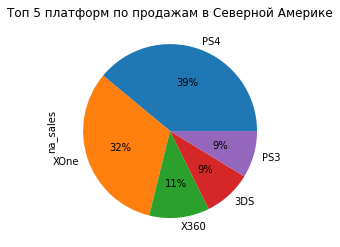

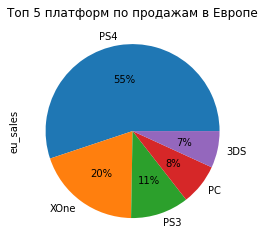

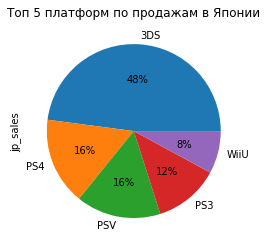

In [33]:
#самые популярные платформы в Северной Америке
df_na_platforms = (df_actual.pivot_table(index=('platform'), 
                                        values = 'na_sales', aggfunc = 'sum')
               .sort_values(by= 'na_sales',ascending=False))

df_na_platforms.head(5).plot(kind='pie', 
                         y='na_sales', 
                         legend=False, 
                         autopct='%1.0f%%', 
                         title = 'Топ 5 платформ по продажам в Северной Америке')

plt.show()

#самые популярные платформы в Европе
df_eu_platforms = (df_actual.pivot_table(index=('platform'), 
                                        values = 'eu_sales', aggfunc = 'sum')
               .sort_values(by='eu_sales',ascending=False))

df_eu_platforms.head(5).plot(kind='pie', 
                         y='eu_sales', 
                         legend=False, 
                         autopct='%1.0f%%', 
                         title = 'Топ 5 платформ по продажам в Европе')

plt.show()

#самые популярные платформы в Японии
df_jp_platforms = (df_actual.pivot_table(index=('platform'), 
                                        values = 'jp_sales', aggfunc = 'sum')
               .sort_values(by='jp_sales',ascending=False))

df_jp_platforms.head(5).plot(kind='pie', 
                         y='jp_sales', 
                         legend=False, 
                         autopct='%1.0f%%', 
                         title = 'Топ 5 платформ по продажам в Японии')

plt.show()

В зависимости от региона популярностью пользуются разные платформы. В Европе и Северной Америке платформа 3DS не очень популярна (7-9%% от общих продаж), а вот в Японии игры на этой платформе покупает почти половина пользователей (48%). 

В Европе и Северной Америке PS4 является лидером продаж (55 и 39%%). А в Японии PS4 на втором месте, ее выбирают 16% игроков.

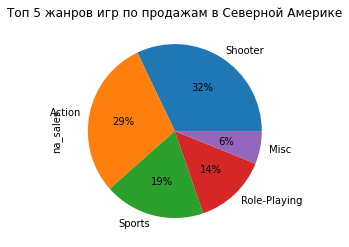

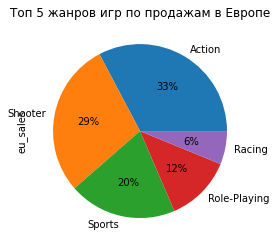

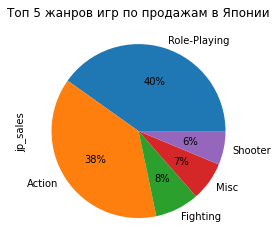

In [34]:
#самые популярные жанры в Северной Америке
df_na_genres = (df_actual.pivot_table(index=('genre'), 
                                        values = 'na_sales', aggfunc = 'sum')
               .sort_values(by= 'na_sales',ascending=False))

df_na_genres.head(5).plot(kind='pie', 
                         y='na_sales', 
                         legend=False, 
                         autopct='%1.0f%%', 
                         title = 'Топ 5 жанров игр по продажам в Северной Америке')

plt.show()

#самые популярные жанры в Европе
df_eu_genres = (df_actual.pivot_table(index=('genre'), 
                                        values = 'eu_sales', aggfunc = 'sum')
               .sort_values(by= 'eu_sales',ascending=False))

df_eu_genres.head(5).plot(kind='pie', 
                         y='eu_sales', 
                         legend=False, 
                         autopct='%1.0f%%', 
                         title = 'Топ 5 жанров игр по продажам в Европе')

plt.show()

#самые популярные жанры в Японии
df_jp_genres = (df_actual.pivot_table(index=('genre'), 
                                        values = 'jp_sales', aggfunc = 'sum')
               .sort_values(by='jp_sales',ascending=False))

df_jp_genres.head(5).plot(kind='pie', 
                         y='jp_sales', 
                         legend=False, 
                         autopct='%1.0f%%', 
                         title = 'Топ 5 жанров игр по продажам в Японии')

plt.show()

Популярные жанры похожи в Северной Америке и Европе, результаты практически одинаковые, наиболее популярны Action, Shooter, Sports, также большую долю составляют игры жанра Role-Playing. 

А вот Япония тут также выделяется, наибольшую долю продаж (40%) составляют игры жанры Role-Playing, затем по популярности идут игры Action (38%).

В целом можно сказать, что игры Action популярны по всех регионах среди рассматриваемых, и в них играет примерно одинаковое количество от общего числа пользователей в каждом регионе (29-38%%).

In [35]:
df_rating = df_actual[['rating', 'na_sales', 'eu_sales', 'jp_sales']] \
    .groupby('rating', as_index=False) \
    .agg({'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales': 'sum'})

display(df_rating)

,rating,na_sales,eu_sales,jp_sales
0,E,50.74,58.06,8.94
1,E10+,33.23,26.16,4.46
2,M,96.42,93.44,8.01
3,T,38.95,34.07,14.78
4,Unknown,64.72,58.95,56.90


В зависимости от рейтинга ESRB, то есть от возрастного ограничения, продажи различаются. Так, наибольшие продажи с рейтингом M (для взрослых), и наименьшие в категориях для детей старше 10 лет и подростков. Это в основном касается Северной Америки и Европы. 

В Японии основная доля продаж приходится на игры без рейтинга. Вероятно, это связано с тем, что рейтинг ESRB присваивается играм в США и Канаде. А в Японии игры продаются без указания данного рейтинга, либо локальным играм этот рейтинг не присваивается.

## Проверим гипотезы

Установим уровень значимости alpha. 

Из открытых источников получила информацию, что есть стандартные уровни значимости 0,1; 0,05; 0,01; 0,001.

Условно их можно выбирать так. Если объем выборки небольшой до 100 единиц, то можно вполне отвергнуть нулевую гипотезу при уровне значимости 0,05 или даже 0,1. При объеме выборки, измеряемой сотнями – от 100 до 1000, следует понизить уровень значимости хотя бы до 0,01. А при больших выборках, измеряемых тысячами наблюдений, уверенно отвергать нулевую гипотезу можно только при значимости меньшей 0,001.

В нашем случае размер выборок будет примерно в диапазоне от 100 до 1000 (всего пользовательских оценок для всех платформ 7462), поэтому установим alpha = 0.01.

In [36]:
alpha = 0.01

### Проверим гипотезу: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Выдвигаем гипотезы:

**Гипотеза Н0:** Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.   
**Гипотеза Н1:** Средние пользовательские рейтинги платформ Xbox One отличается (меньше или больше), чем у PC.

В Python есть специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: scipy.stats.ttest_ind(array1, array2, equal_var, alternative). Применим его.

In [37]:
#создаем отдельные датафреймы с данными по платформам
xone = df_actual.query('platform == "XOne"')
pc = df_actual.query('platform == "PC"')

In [38]:
results = st.ttest_ind(xone['user_score'], 
                       pc['user_score'],
                       equal_var=False,
                       alternative = 'two-sided',
                       nan_policy='omit')
print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

0.11601398086668943
Не удалось отвергнуть нулевую гипотезу


Нам не удалось отвергнуть нулевую гипотезу. Таким образом, мы можем предположить, что средние пользовательские рейтинги платформ Xbox One и PC примерно одинаковые. Посмотрим фактические средние рейтинги.

In [39]:
display(df_actual.query('platform in ["XOne", "PC"]') \
.pivot_table(index=('platform'), values = 'user_score', aggfunc = 'mean') \
.sort_values(by= 'user_score',ascending=False))

,user_score
platform,
XOne,6.594545
PC,6.298361


Рейтинги действительно довольно близки по значению.

### Проверим гипотезу: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Выдвигаем гипотезы:

**Гипотеза Н0:** Средние пользовательские рейтинги жанров Action и Sports одинаковые.   
**Гипотеза Н1:** Средние пользовательские рейтинги жанров Action и Sports отличаются.

In [40]:
action = df_actual.query('genre == "Action"')
sports = df_actual.query('genre == "Sports"')

In [41]:
results = st.ttest_ind(action['user_score'], 
                       sports['user_score'],
                       equal_var=False,
                       alternative = 'two-sided',
                       nan_policy='omit')
print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

1.182555038264477e-14
Отвергаем нулевую гипотезу


Мы отвергли нулевую гипотезу. Таким образом, мы можем предположить, что средние пользовательские рейтинги жанров Action и Sports различаются. Посмотрим фактические средние рейтинги.

In [42]:
display(df_actual.query('genre in ["Action", "Sports"]') \
.pivot_table(index=('genre'), values = 'user_score', aggfunc = 'mean') \
.sort_values(by= 'user_score',ascending=False))

,user_score
genre,
Action,6.760606
Sports,5.225197


Средние пользовательские рейтинги игр жанра Action значительно выше игр в жанре Sports.

## Общий вывод

Мы изучили данные о продажах компютерных игр и выявили следующее:

- наибольшее количество компьютерных игр выпускалось в период с 2002 по 2011 год (примерно 800-1100 игр в год). Далее начался спад, в год стало выпускаться в 2 раза меньше игр, чем выпускалось на пике.


- самыми популярными платформами за последние 3 года являются PS4 (69.25), XOne (26.15) и 3DS (15.14), последняя в основном за счет продаж в Японии.


- в целом наблюдается спад с продажах игр, по имеющимся данным продажи на всех платформах падают, нет ни одной платформы, у которой продажи за последние годы росли.


- оценки пользователей и критиков значительного влияния на продажи не оказывают.


- наиболее популярные жанры Shooter, Action, Role-Playing. При этом прибыль они приносят по-разному. В жанре Shooter выпускается относительно мало игр, но они более дорогие, а в жанре Action выпускается наибольшее количество игр, но каждая из них в среднем приносит небольшую прибыль. В жанре Role-Playing выпускается больше игр, чем в Shooter, но прибыль в среднем выше, чем у жанра Action. 


- в зависимости от региона продаж предпочтения пользователей различаются. В Северной Америке и Европе большинство игроков предпочитает платформу PS4 и жанры Action и Shooter. Японские игроки предпочитают 3DS и жанры Role-Playing и Action.

Также мы проверили две гипотезы, по результатам проверки которых можем сказать, что 
средние пользовательские рейтинги платформ Xbox One и PC примерно одинаковые, средние пользовательские рейтинги игр жанра Action значительно выше игр в жанре Sports.

По результатам произведенного анализа при планировании кампаний по продаже игр на 2017 год рекомендую: 
- отдавать предпочтение платформам PS4 и 3DS;
- отдавать предпочтение жанрам Action и Role-Playing;
- учитывать регион для рекламной кампании, для Северной Америки/Европы и Японии следует ориентироваться на разные платформы/жанры.